In [1]:
%matplotlib inline
import matplotlib as plt
import seaborn as sns
import pandas as pd
import numpy as np
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [2]:
import expectexception

### Read combined dataset to pandas dataframe

In [3]:
df = pd.read_csv("../data/combinedData.csv")
provider = pd.read_csv("../data/train.csv")

/Users/hungrysoul/opt/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3063: DtypeWarning: Columns (10,13,14,24) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [4]:
df = df.merge(provider,on="Provider", how="left")

In [5]:
df.shape

(693603, 65)

In [6]:
df.groupby("PotentialFraud").size()

PotentialFraud
No     345415
Yes    212796
dtype: int64

In [7]:
df.head()

,Unnamed: 0,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,AdmissionDt,ClmAdmitDiagnosisCode,DeductibleAmtPaid,DischargeDt,DiagnosisGroupCode,ClmDiagnosisCode_1,ClmDiagnosisCode_2,ClmDiagnosisCode_3,ClmDiagnosisCode_4,ClmDiagnosisCode_5,ClmDiagnosisCode_6,ClmDiagnosisCode_7,ClmDiagnosisCode_8,ClmDiagnosisCode_9,ClmDiagnosisCode_10,ClmProcedureCode_1,ClmProcedureCode_2,ClmProcedureCode_3,ClmProcedureCode_4,ClmProcedureCode_5,ClmProcedureCode_6,Set,Status,DOB,DOD,Gender,Race,RenalDiseaseIndicator,State,County,NoOfMonths_PartACov,NoOfMonths_PartBCov,Alzheimer,HeartFailure,KidneyDisease,Cancer,ObstrPulmonary,Depression,Diabetes,IschemicHeart,Osteoporasis,RheumatoidArthritis,Stroke,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt,WhetherDead,NumChronics,NumProc,NumDiag,AdmissionDays,ClaimDays,Age,PotentialFraud
0,0,BENE11001,CLM46614,2009-04-12,2009-04-18,PRV55912,26000,PHY390922,NaN,NaN,2009-04-12,7866,1068.0,2009-04-18,201,1970,4019,5853,7843,2768,71590,2724,19889,5849,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Train,in,1943-01-01,NaN,1,1,0,Pennsylvania,230,12,12,1,0,1,0,0,1,1,1,0,1,1,36000,3204,60,70,0,7,0,10,7.0,7,66.0,Yes
1,1,BENE11001,CLM66048,2009-08-31,2009-09-02,PRV55907,5000,PHY318495,PHY318495,NaN,2009-08-31,6186,1068.0,2009-09-02,750,6186,2948,56400,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7092.0,NaN,NaN,NaN,NaN,NaN,Train,in,1943-01-01,NaN,1,1,0,Pennsylvania,230,12,12,1,0,1,0,0,1,1,1,0,1,1,36000,3204,60,70,0,7,1,4,3.0,3,67.0,No
2,2,BENE11001,CLM68358,2009-09-17,2009-09-20,PRV56046,5000,PHY372395,NaN,PHY324689,2009-09-17,29590,1068.0,2009-09-20,883,29623,30390,71690,34590,V1581,32723,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Train,in,1943-01-01,NaN,1,1,0,Pennsylvania,230,12,12,1,0,1,0,0,1,1,1,0,1,1,36000,3204,60,70,0,7,0,7,4.0,4,67.0,No
3,3,BENE11011,CLM38412,2009-02-14,2009-02-22,PRV52405,5000,PHY369659,PHY392961,PHY349768,2009-02-14,431,1068.0,2009-02-22,067,43491,2762,7843,32723,V1041,4254,25062,40390,4019,NaN,331.0,NaN,NaN,NaN,NaN,NaN,Train,in,1914-03-01,NaN,0,2,0,Alabama,360,12,12,0,1,1,0,0,1,1,0,0,1,1,5000,1068,250,320,0,6,1,10,9.0,9,95.0,No
4,4,BENE11011,CLM144521,2009-01-18,2009-01-18,PRV52314,50,PHY379398,NaN,NaN,NaN,78900,0.0,NaN,NaN,78969,78701,V5866,59389,2449,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Train,out,1914-03-01,NaN,0,2,0,Alabama,360,12,12,0,1,1,0,0,1,1,0,0,1,1,5000,1068,250,320,0,6,0,6,NaN,1,95.0,No


In [166]:
df.shape

(693603, 65)

In [165]:
df["Provider"].nunique()

6763

In [8]:
provider.head()

,Provider,PotentialFraud
0,PRV51001,No
1,PRV51003,Yes
2,PRV51004,No
3,PRV51005,Yes
4,PRV51007,No


In [9]:
df.shape

(693603, 65)

### Creating df1 with new column "conditions"

In [10]:
df1 = df

In [11]:
illness = df1[["ClaimID",
           "Depression",
           "Alzheimer",
           "RheumatoidArthritis",        
           "Diabetes",
           "KidneyDisease",
           "IschemicHeart",
           "Stroke",
           "Osteoporasis",
           "ObstrPulmonary",
           "HeartFailure",
           "Cancer",
#            "ClmAdmitDiagnosisCode",
#            "ClmDiagnosisCode_1",
#            "ClmDiagnosisCode_2",
#            "ClmDiagnosisCode_3",
#            "ClmDiagnosisCode_4",
#            "ClmDiagnosisCode_5",
#            "ClmDiagnosisCode_6",
#            "ClmDiagnosisCode_7",
#            "ClmDiagnosisCode_8",
#            "ClmDiagnosisCode_9",
#            "ClmDiagnosisCode_10",
#            "ClmProcedureCode_1",
#            "ClmProcedureCode_2",
#            "ClmProcedureCode_3",
#            "ClmProcedureCode_4",
#            "ClmProcedureCode_5",
#            "ClmProcedureCode_6"
           ]]

In [366]:
MBA_illness = df1[["ClaimID",
           "BeneID",
           "Provider",
           "Depression",     
           "Diabetes",
           "KidneyDisease",
           "IschemicHeart"
            ]]

In [371]:
MBA_provider = MBA_illness.groupby("Provider").sum()

In [372]:
MBA_provider["precondition_count"] = MBA_provider["Depression"] + MBA_provider["Diabetes"] + MBA_provider["KidneyDisease"] + MBA_provider["IschemicHeart"]

In [373]:
MBA_provider.head()

,Depression,Diabetes,KidneyDisease,IschemicHeart,precondition_count
Provider,,,,,
PRV51001,9,21,17,23,70
PRV51002,91,147,72,151,461
PRV51003,54,100,64,112,330
PRV51004,63,105,50,108,326
PRV51005,485,799,507,895,2686


In [374]:
MBA_provider.shape

(6763, 5)

In [365]:
MBA_provider.to_csv("../data/MBA_feature.csv")

In [397]:
MBA_bene = MBA_illness.groupby(["Provider","BeneID"]).size().reset_index()

In [398]:
MBA_bene.head()

,Provider,BeneID,0
0,PRV51001,BENE102690,1
1,PRV51001,BENE106078,1
2,PRV51001,BENE11727,1
3,PRV51001,BENE123416,1
4,PRV51001,BENE126477,1


In [402]:
MBA_bene = MBA_bene.groupby("Provider").count()

In [403]:
MBA_bene.head()

,BeneID,0
Provider,,
PRV51001,24,24
PRV51002,169,169
PRV51003,117,117
PRV51004,138,138
PRV51005,495,495


In [407]:
MBA_bene = MBA_bene[["BeneID"]].reset_index()

In [411]:
MBA_bene.columns = ["Provider","Bene_count"]

In [412]:
MBA_bene.head()

,Provider,Bene_count
0,PRV51001,24
1,PRV51002,169
2,PRV51003,117
3,PRV51004,138
4,PRV51005,495


In [413]:
MBA_bene.to_csv("../data/MBA_bene.csv")

In [ ]:


illness.head()

In [13]:
for col in illness.columns:
    illness[col].replace(1,col, inplace=True)

/Users/hungrysoul/opt/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:6746: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


In [14]:
illness.head()

,ClaimID,Depression,Alzheimer,RheumatoidArthritis,Diabetes,KidneyDisease,IschemicHeart,Stroke,Osteoporasis,ObstrPulmonary,HeartFailure,Cancer
0,CLM46614,Depression,Alzheimer,RheumatoidArthritis,Diabetes,KidneyDisease,IschemicHeart,Stroke,0,0,0,0
1,CLM66048,Depression,Alzheimer,RheumatoidArthritis,Diabetes,KidneyDisease,IschemicHeart,Stroke,0,0,0,0
2,CLM68358,Depression,Alzheimer,RheumatoidArthritis,Diabetes,KidneyDisease,IschemicHeart,Stroke,0,0,0,0
3,CLM38412,Depression,0,RheumatoidArthritis,Diabetes,KidneyDisease,0,Stroke,0,0,HeartFailure,0
4,CLM144521,Depression,0,RheumatoidArthritis,Diabetes,KidneyDisease,0,Stroke,0,0,HeartFailure,0


In [15]:
cols = [   "Depression",
           "Alzheimer",
           "RheumatoidArthritis",        
           "Diabetes",
           "KidneyDisease",
           "IschemicHeart",
           "Stroke",
           "Osteoporasis",
           "ObstrPulmonary",
           "HeartFailure",
           "Cancer"
           ]

illness["preconditions"] = illness[cols].values.tolist()

/Users/hungrysoul/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [16]:
illness["preconditions"] = illness["preconditions"].apply(lambda x: list(filter(lambda a: a != 0, x)))

/Users/hungrysoul/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [17]:
illness["preconditions"] = illness["preconditions"].apply(lambda x: tuple(x))

/Users/hungrysoul/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [18]:
illness.drop(cols, axis=1, inplace=True)

/Users/hungrysoul/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [19]:
illness.head()

,ClaimID,preconditions
0,CLM46614,"(Depression, Alzheimer, RheumatoidArthritis, D..."
1,CLM66048,"(Depression, Alzheimer, RheumatoidArthritis, D..."
2,CLM68358,"(Depression, Alzheimer, RheumatoidArthritis, D..."
3,CLM38412,"(Depression, RheumatoidArthritis, Diabetes, Ki..."
4,CLM144521,"(Depression, RheumatoidArthritis, Diabetes, Ki..."


In [20]:
df1 = df1.merge(illness, on="ClaimID")

In [21]:
df1.head()

,Unnamed: 0,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,AdmissionDt,ClmAdmitDiagnosisCode,DeductibleAmtPaid,DischargeDt,DiagnosisGroupCode,ClmDiagnosisCode_1,ClmDiagnosisCode_2,ClmDiagnosisCode_3,ClmDiagnosisCode_4,ClmDiagnosisCode_5,ClmDiagnosisCode_6,ClmDiagnosisCode_7,ClmDiagnosisCode_8,ClmDiagnosisCode_9,ClmDiagnosisCode_10,ClmProcedureCode_1,ClmProcedureCode_2,ClmProcedureCode_3,ClmProcedureCode_4,ClmProcedureCode_5,ClmProcedureCode_6,Set,Status,DOB,DOD,Gender,Race,RenalDiseaseIndicator,State,County,NoOfMonths_PartACov,NoOfMonths_PartBCov,Alzheimer,HeartFailure,KidneyDisease,Cancer,ObstrPulmonary,Depression,Diabetes,IschemicHeart,Osteoporasis,RheumatoidArthritis,Stroke,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt,WhetherDead,NumChronics,NumProc,NumDiag,AdmissionDays,ClaimDays,Age,PotentialFraud,preconditions
0,0,BENE11001,CLM46614,2009-04-12,2009-04-18,PRV55912,26000,PHY390922,NaN,NaN,2009-04-12,7866,1068.0,2009-04-18,201,1970,4019,5853,7843,2768,71590,2724,19889,5849,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Train,in,1943-01-01,NaN,1,1,0,Pennsylvania,230,12,12,1,0,1,0,0,1,1,1,0,1,1,36000,3204,60,70,0,7,0,10,7.0,7,66.0,Yes,"(Depression, Alzheimer, RheumatoidArthritis, D..."
1,1,BENE11001,CLM66048,2009-08-31,2009-09-02,PRV55907,5000,PHY318495,PHY318495,NaN,2009-08-31,6186,1068.0,2009-09-02,750,6186,2948,56400,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7092.0,NaN,NaN,NaN,NaN,NaN,Train,in,1943-01-01,NaN,1,1,0,Pennsylvania,230,12,12,1,0,1,0,0,1,1,1,0,1,1,36000,3204,60,70,0,7,1,4,3.0,3,67.0,No,"(Depression, Alzheimer, RheumatoidArthritis, D..."
2,2,BENE11001,CLM68358,2009-09-17,2009-09-20,PRV56046,5000,PHY372395,NaN,PHY324689,2009-09-17,29590,1068.0,2009-09-20,883,29623,30390,71690,34590,V1581,32723,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Train,in,1943-01-01,NaN,1,1,0,Pennsylvania,230,12,12,1,0,1,0,0,1,1,1,0,1,1,36000,3204,60,70,0,7,0,7,4.0,4,67.0,No,"(Depression, Alzheimer, RheumatoidArthritis, D..."
3,3,BENE11011,CLM38412,2009-02-14,2009-02-22,PRV52405,5000,PHY369659,PHY392961,PHY349768,2009-02-14,431,1068.0,2009-02-22,067,43491,2762,7843,32723,V1041,4254,25062,40390,4019,NaN,331.0,NaN,NaN,NaN,NaN,NaN,Train,in,1914-03-01,NaN,0,2,0,Alabama,360,12,12,0,1,1,0,0,1,1,0,0,1,1,5000,1068,250,320,0,6,1,10,9.0,9,95.0,No,"(Depression, RheumatoidArthritis, Diabetes, Ki..."
4,4,BENE11011,CLM144521,2009-01-18,2009-01-18,PRV52314,50,PHY379398,NaN,NaN,NaN,78900,0.0,NaN,NaN,78969,78701,V5866,59389,2449,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Train,out,1914-03-01,NaN,0,2,0,Alabama,360,12,12,0,1,1,0,0,1,1,0,0,1,1,5000,1068,250,320,0,6,0,6,NaN,1,95.0,No,"(Depression, RheumatoidArthritis, Diabetes, Ki..."


### Extract ClaimID and boolean columns for diagnosed illness

In [22]:
diag = df[["ClaimID",
           "Depression",
           "Alzheimer",
           "RheumatoidArthritis",        
           "Diabetes",
           "KidneyDisease",
           "IschemicHeart",
           "Stroke",
           "Osteoporasis",
           "ObstrPulmonary",
           "HeartFailure",
           "Cancer",
           ]]

In [23]:
diag.head()

,ClaimID,Depression,Alzheimer,RheumatoidArthritis,Diabetes,KidneyDisease,IschemicHeart,Stroke,Osteoporasis,ObstrPulmonary,HeartFailure,Cancer
0,CLM46614,1,1,1,1,1,1,1,0,0,0,0
1,CLM66048,1,1,1,1,1,1,1,0,0,0,0
2,CLM68358,1,1,1,1,1,1,1,0,0,0,0
3,CLM38412,1,0,1,1,1,0,1,0,0,1,0
4,CLM144521,1,0,1,1,1,0,1,0,0,1,0


In [24]:
diag = diag.fillna(0).set_index('ClaimID')

In [25]:
diag.head()

,Depression,Alzheimer,RheumatoidArthritis,Diabetes,KidneyDisease,IschemicHeart,Stroke,Osteoporasis,ObstrPulmonary,HeartFailure,Cancer
ClaimID,,,,,,,,,,,
CLM46614,1,1,1,1,1,1,1,0,0,0,0
CLM66048,1,1,1,1,1,1,1,0,0,0,0
CLM68358,1,1,1,1,1,1,1,0,0,0,0
CLM38412,1,0,1,1,1,0,1,0,0,1,0
CLM144521,1,0,1,1,1,0,1,0,0,1,0


In [26]:
diag.shape

(693603, 11)

### Most Frequent Items Visualization

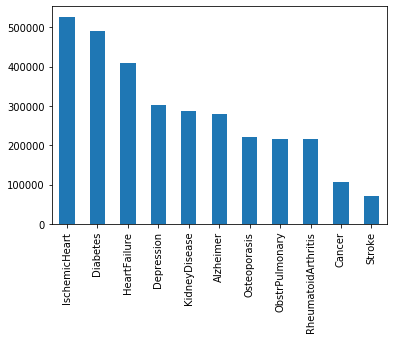

In [27]:
count = diag.sum(axis = 0).sort_values(ascending=False)
count.plot(kind="bar")

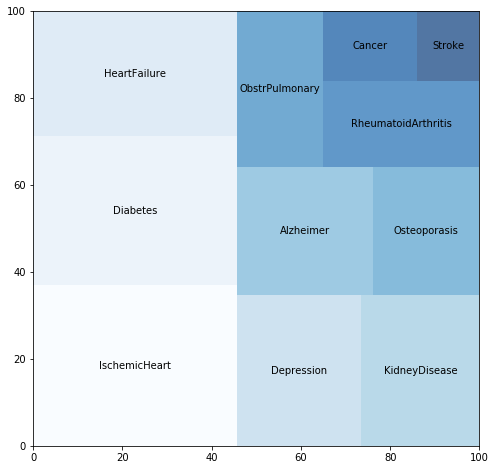

In [28]:
import squarify
plt.rcParams['figure.figsize']=(8,8)
Items = count.to_frame()
size = Items[0].values
lab = Items.index
color = plt.cm.Blues(np.linspace(0,2,22))
squarify.plot(sizes=size, label=lab, alpha = 0.7, color=color)
#plt.title('Tree map of Most Frequent Items')
#plt.axis('off')
#plt.show()

### Run Apriori Algorithm and Association Rules

In [29]:
frequent_itemsets = apriori(diag, min_support=0.1, use_colnames=True)
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1)
rules.head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Alzheimer),(Depression),0.402142,0.434364,0.216559,0.538514,1.239776,0.041883,1.225684
1,(Depression),(Alzheimer),0.434364,0.402142,0.216559,0.498566,1.239776,0.041883,1.192296
2,(RheumatoidArthritis),(Depression),0.310957,0.434364,0.163506,0.525814,1.210537,0.028437,1.192856
3,(Depression),(RheumatoidArthritis),0.434364,0.310957,0.163506,0.376426,1.210537,0.028437,1.104989
4,(Diabetes),(Depression),0.705953,0.434364,0.347886,0.492790,1.134509,0.041246,1.115191


In [30]:
rules.sort_values("lift")

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
63,(Osteoporasis),(IschemicHeart),0.317396,0.759334,0.258247,0.813643,1.071522,0.017238,1.291425
62,(IschemicHeart),(Osteoporasis),0.759334,0.317396,0.258247,0.340097,1.071522,0.017238,1.034400
9,(Depression),(IschemicHeart),0.434364,0.759334,0.357706,0.823517,1.084526,0.027879,1.363683
8,(IschemicHeart),(Depression),0.759334,0.434364,0.357706,0.471079,1.084526,0.027879,1.069415
45,(IschemicHeart),(Diabetes),0.759334,0.705953,0.589180,0.775917,1.099106,0.053126,1.312226
...,...,...,...,...,...,...,...,...,...
824,"(Alzheimer, KidneyDisease)","(Diabetes, ObstrPulmonary)",0.210804,0.266394,0.102126,0.484461,1.818586,0.045969,1.422988
1417,"(HeartFailure, IschemicHeart, KidneyDisease)","(Diabetes, ObstrPulmonary)",0.290734,0.266394,0.141990,0.488386,1.833319,0.064541,1.433904
1428,"(Diabetes, ObstrPulmonary)","(HeartFailure, IschemicHeart, KidneyDisease)",0.266394,0.290734,0.141990,0.533008,1.833319,0.064541,1.518798
1414,"(Diabetes, IschemicHeart, ObstrPulmonary)","(HeartFailure, KidneyDisease)",0.242544,0.318835,0.141990,0.585422,1.836128,0.064659,1.643033


In [31]:
#rules = rules[(rules['lift'] >= 1)&(rules['confidence'] >= 0.8)].sort_values("lift",ascending=False)

In [32]:
#rules1 = rules[(rules['support'] >= 0.3)&(rules['lift'] >= 1)&(rules['confidence'] >= 0.7)].sort_values("lift",ascending=False)

### Create New Column with a Set of Antecedents and Consequents Rules - To merge with original Dataset

In [33]:
rules["ante_set"] = rules["antecedents"].apply(lambda x: tuple(x))
rules["con_set"] = rules["consequents"].apply(lambda x: tuple(x))

In [34]:
rules.head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,ante_set,con_set
0,(Alzheimer),(Depression),0.402142,0.434364,0.216559,0.538514,1.239776,0.041883,1.225684,"(Alzheimer,)","(Depression,)"
1,(Depression),(Alzheimer),0.434364,0.402142,0.216559,0.498566,1.239776,0.041883,1.192296,"(Depression,)","(Alzheimer,)"
2,(RheumatoidArthritis),(Depression),0.310957,0.434364,0.163506,0.525814,1.210537,0.028437,1.192856,"(RheumatoidArthritis,)","(Depression,)"
3,(Depression),(RheumatoidArthritis),0.434364,0.310957,0.163506,0.376426,1.210537,0.028437,1.104989,"(Depression,)","(RheumatoidArthritis,)"
4,(Diabetes),(Depression),0.705953,0.434364,0.347886,0.492790,1.134509,0.041246,1.115191,"(Diabetes,)","(Depression,)"


In [35]:
rules['preconditions'] = rules['ante_set'] + rules['con_set']
#rules['conditions'] = rules.apply(lambda x: x['ante_set'].union(x['con_set']), axis=1)

In [36]:
rules.shape

(1438, 12)

In [37]:
rules.head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,ante_set,con_set,preconditions
0,(Alzheimer),(Depression),0.402142,0.434364,0.216559,0.538514,1.239776,0.041883,1.225684,"(Alzheimer,)","(Depression,)","(Alzheimer, Depression)"
1,(Depression),(Alzheimer),0.434364,0.402142,0.216559,0.498566,1.239776,0.041883,1.192296,"(Depression,)","(Alzheimer,)","(Depression, Alzheimer)"
2,(RheumatoidArthritis),(Depression),0.310957,0.434364,0.163506,0.525814,1.210537,0.028437,1.192856,"(RheumatoidArthritis,)","(Depression,)","(RheumatoidArthritis, Depression)"
3,(Depression),(RheumatoidArthritis),0.434364,0.310957,0.163506,0.376426,1.210537,0.028437,1.104989,"(Depression,)","(RheumatoidArthritis,)","(Depression, RheumatoidArthritis)"
4,(Diabetes),(Depression),0.705953,0.434364,0.347886,0.492790,1.134509,0.041246,1.115191,"(Diabetes,)","(Depression,)","(Diabetes, Depression)"


### Plot Output and Filtered Rules

In [38]:
lift=rules['lift'].values
support=rules['support'].values
confidence=rules['confidence'].values
conviction=rules['conviction'].values

In [39]:
lift.max()

1.8361284683046184

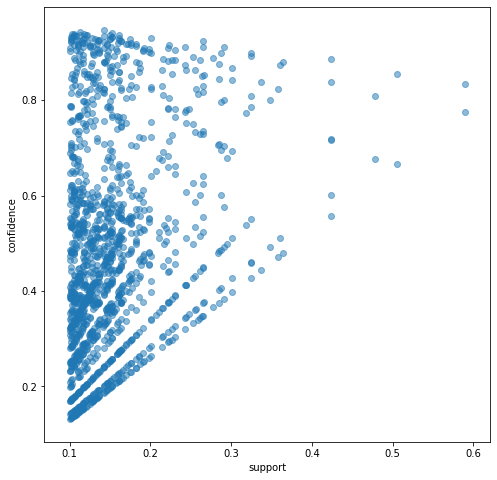

In [40]:
import random
import matplotlib.pyplot as plt
 
for i in range (len(support)):
    support[i] = support[i]
    confidence[i] = confidence[i]

plt.scatter(support, confidence,   alpha=0.5)
plt.xlabel('support')
plt.ylabel('confidence') 
plt.show()

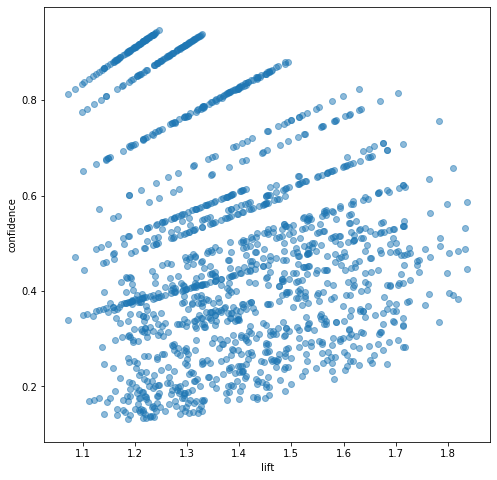

In [41]:
for i in range (len(lift)):
    lift[i] = lift[i]
    confidence[i] = confidence[i]

plt.scatter(lift, confidence, alpha=0.5)
plt.xlabel('lift')
plt.ylabel('confidence') 
plt.show()

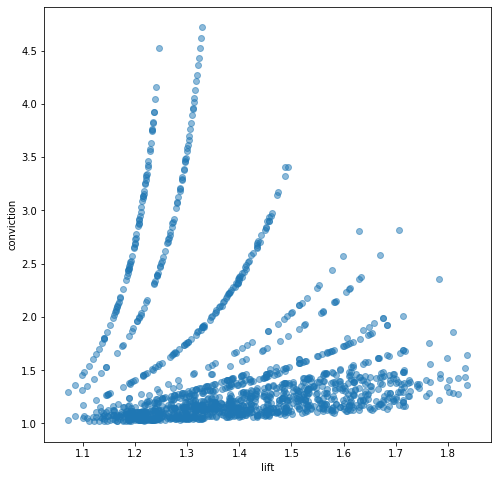

In [42]:
for i in range (len(lift)):
    lift[i] = lift[i]
    conviction[i] = conviction[i]

plt.scatter(lift, conviction, alpha=0.5)
plt.xlabel('lift')
plt.ylabel('conviction') 
plt.show()

### Combining df1 with Rules

In [43]:
df1.head()

,Unnamed: 0,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,AdmissionDt,ClmAdmitDiagnosisCode,DeductibleAmtPaid,DischargeDt,DiagnosisGroupCode,ClmDiagnosisCode_1,ClmDiagnosisCode_2,ClmDiagnosisCode_3,ClmDiagnosisCode_4,ClmDiagnosisCode_5,ClmDiagnosisCode_6,ClmDiagnosisCode_7,ClmDiagnosisCode_8,ClmDiagnosisCode_9,ClmDiagnosisCode_10,ClmProcedureCode_1,ClmProcedureCode_2,ClmProcedureCode_3,ClmProcedureCode_4,ClmProcedureCode_5,ClmProcedureCode_6,Set,Status,DOB,DOD,Gender,Race,RenalDiseaseIndicator,State,County,NoOfMonths_PartACov,NoOfMonths_PartBCov,Alzheimer,HeartFailure,KidneyDisease,Cancer,ObstrPulmonary,Depression,Diabetes,IschemicHeart,Osteoporasis,RheumatoidArthritis,Stroke,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt,WhetherDead,NumChronics,NumProc,NumDiag,AdmissionDays,ClaimDays,Age,PotentialFraud,preconditions
0,0,BENE11001,CLM46614,2009-04-12,2009-04-18,PRV55912,26000,PHY390922,NaN,NaN,2009-04-12,7866,1068.0,2009-04-18,201,1970,4019,5853,7843,2768,71590,2724,19889,5849,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Train,in,1943-01-01,NaN,1,1,0,Pennsylvania,230,12,12,1,0,1,0,0,1,1,1,0,1,1,36000,3204,60,70,0,7,0,10,7.0,7,66.0,Yes,"(Depression, Alzheimer, RheumatoidArthritis, D..."
1,1,BENE11001,CLM66048,2009-08-31,2009-09-02,PRV55907,5000,PHY318495,PHY318495,NaN,2009-08-31,6186,1068.0,2009-09-02,750,6186,2948,56400,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7092.0,NaN,NaN,NaN,NaN,NaN,Train,in,1943-01-01,NaN,1,1,0,Pennsylvania,230,12,12,1,0,1,0,0,1,1,1,0,1,1,36000,3204,60,70,0,7,1,4,3.0,3,67.0,No,"(Depression, Alzheimer, RheumatoidArthritis, D..."
2,2,BENE11001,CLM68358,2009-09-17,2009-09-20,PRV56046,5000,PHY372395,NaN,PHY324689,2009-09-17,29590,1068.0,2009-09-20,883,29623,30390,71690,34590,V1581,32723,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Train,in,1943-01-01,NaN,1,1,0,Pennsylvania,230,12,12,1,0,1,0,0,1,1,1,0,1,1,36000,3204,60,70,0,7,0,7,4.0,4,67.0,No,"(Depression, Alzheimer, RheumatoidArthritis, D..."
3,3,BENE11011,CLM38412,2009-02-14,2009-02-22,PRV52405,5000,PHY369659,PHY392961,PHY349768,2009-02-14,431,1068.0,2009-02-22,067,43491,2762,7843,32723,V1041,4254,25062,40390,4019,NaN,331.0,NaN,NaN,NaN,NaN,NaN,Train,in,1914-03-01,NaN,0,2,0,Alabama,360,12,12,0,1,1,0,0,1,1,0,0,1,1,5000,1068,250,320,0,6,1,10,9.0,9,95.0,No,"(Depression, RheumatoidArthritis, Diabetes, Ki..."
4,4,BENE11011,CLM144521,2009-01-18,2009-01-18,PRV52314,50,PHY379398,NaN,NaN,NaN,78900,0.0,NaN,NaN,78969,78701,V5866,59389,2449,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Train,out,1914-03-01,NaN,0,2,0,Alabama,360,12,12,0,1,1,0,0,1,1,0,0,1,1,5000,1068,250,320,0,6,0,6,NaN,1,95.0,No,"(Depression, RheumatoidArthritis, Diabetes, Ki..."


In [44]:
df1.shape

(693603, 66)

In [45]:
df1_rules = df1.merge(rules, on="preconditions")

In [46]:
df1_rules.shape

(176202, 77)

In [47]:
df1_rules.head()

,Unnamed: 0,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,AdmissionDt,ClmAdmitDiagnosisCode,DeductibleAmtPaid,DischargeDt,DiagnosisGroupCode,ClmDiagnosisCode_1,ClmDiagnosisCode_2,ClmDiagnosisCode_3,ClmDiagnosisCode_4,ClmDiagnosisCode_5,ClmDiagnosisCode_6,ClmDiagnosisCode_7,ClmDiagnosisCode_8,ClmDiagnosisCode_9,ClmDiagnosisCode_10,ClmProcedureCode_1,ClmProcedureCode_2,ClmProcedureCode_3,ClmProcedureCode_4,ClmProcedureCode_5,ClmProcedureCode_6,Set,Status,DOB,DOD,Gender,Race,RenalDiseaseIndicator,State,County,NoOfMonths_PartACov,NoOfMonths_PartBCov,Alzheimer,HeartFailure,KidneyDisease,Cancer,ObstrPulmonary,Depression,Diabetes,IschemicHeart,Osteoporasis,RheumatoidArthritis,Stroke,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt,WhetherDead,NumChronics,NumProc,NumDiag,AdmissionDays,ClaimDays,Age,PotentialFraud,preconditions,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,ante_set,con_set
0,21,BENE11028,CLM62376,2009-08-03,2009-08-07,PRV51148,6000,PHY346286,PHY405514,NaN,2009-08-03,78605,1068.0,2009-08-07,379,56212,25000,30000,73300,2766,53081,2851,4439,41401,NaN,9904.0,NaN,NaN,NaN,NaN,NaN,Train,in,1941-12-01,NaN,1,1,0,Oregon,230,12,12,0,0,0,0,0,0,1,1,1,0,0,6000,1068,0,0,0,3,1,10,5.0,5,68.0,Yes,"(Diabetes, IschemicHeart, Osteoporasis)","(Diabetes, IschemicHeart)",(Osteoporasis),0.589180,0.317396,0.214195,0.363547,1.145404,0.027191,1.072512,"(Diabetes, IschemicHeart)","(Osteoporasis,)"
1,21,BENE11028,CLM62376,2009-08-03,2009-08-07,PRV51148,6000,PHY346286,PHY405514,NaN,2009-08-03,78605,1068.0,2009-08-07,379,56212,25000,30000,73300,2766,53081,2851,4439,41401,NaN,9904.0,NaN,NaN,NaN,NaN,NaN,Train,in,1941-12-01,NaN,1,1,0,Oregon,230,12,12,0,0,0,0,0,0,1,1,1,0,0,6000,1068,0,0,0,3,1,10,5.0,5,68.0,Yes,"(Diabetes, IschemicHeart, Osteoporasis)",(Diabetes),"(IschemicHeart, Osteoporasis)",0.705953,0.258247,0.214195,0.303412,1.174890,0.031884,1.064837,"(Diabetes,)","(IschemicHeart, Osteoporasis)"
2,217,BENE11185,CLM35019,2009-01-22,2009-01-24,PRV52178,4000,PHY411732,NaN,PHY432365,2009-01-22,2512,1068.0,2009-01-24,637,25080,2749,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Train,in,1918-06-01,NaN,0,1,0,Florida,120,12,12,0,0,0,0,0,0,1,1,1,0,0,10110,2136,1450,40,0,3,0,3,3.0,3,91.0,Yes,"(Diabetes, IschemicHeart, Osteoporasis)","(Diabetes, IschemicHeart)",(Osteoporasis),0.589180,0.317396,0.214195,0.363547,1.145404,0.027191,1.072512,"(Diabetes, IschemicHeart)","(Osteoporasis,)"
3,217,BENE11185,CLM35019,2009-01-22,2009-01-24,PRV52178,4000,PHY411732,NaN,PHY432365,2009-01-22,2512,1068.0,2009-01-24,637,25080,2749,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Train,in,1918-06-01,NaN,0,1,0,Florida,120,12,12,0,0,0,0,0,0,1,1,1,0,0,10110,2136,1450,40,0,3,0,3,3.0,3,91.0,Yes,"(Diabetes, IschemicHeart, Osteoporasis)",(Diabetes),"(IschemicHeart, Osteoporasis)",0.705953,0.258247,0.214195,0.303412,1.174890,0.031884,1.064837,"(Diabetes,)","(IschemicHeart, Osteoporasis)"
4,218,BENE11185,CLM38541,2009-02-15,2009-02-16,PRV52173,6000,PHY418617,PHY408878,NaN,2009-02-15,43310,1068.0,2009-02-16,102,43310,41401,4019,V1046,43330,2724,4387,7820,27651,NaN,3812.0,NaN,NaN,NaN,NaN,NaN,Train,in,1918-06-01,NaN,0,1,0,Florida,120,12,12,0,0,0,0,0,0,1,1,1,0,0,10110,2136,1450,40,0,3,1,10,2.0,2,91.0,Yes,"(Diabetes, IschemicHeart, Osteoporasis)","(Diabetes, IschemicHeart)",(Osteoporasis),0.589180,0.317396,0.214195,0.363547,1.145404,0.027191,1.072512,"(Diabetes, IschemicHeart)","(Osteoporasis,)"


In [48]:
df1_rules.groupby("PotentialFraud").size()

PotentialFraud
No     88423
Yes    53241
dtype: int64

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fecb0017c50>,
      dtype=object)

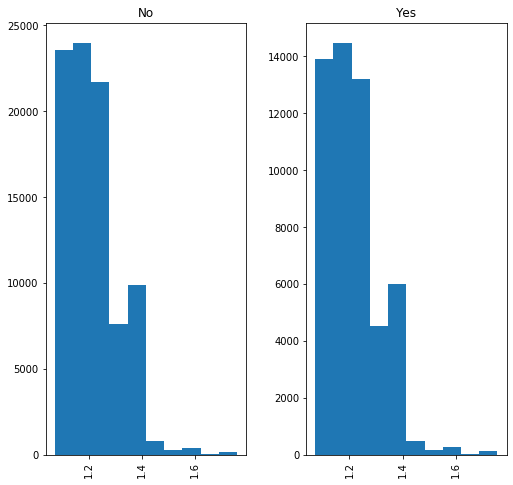

In [49]:
df1_rules[["lift","PotentialFraud"]].hist(by = "PotentialFraud")

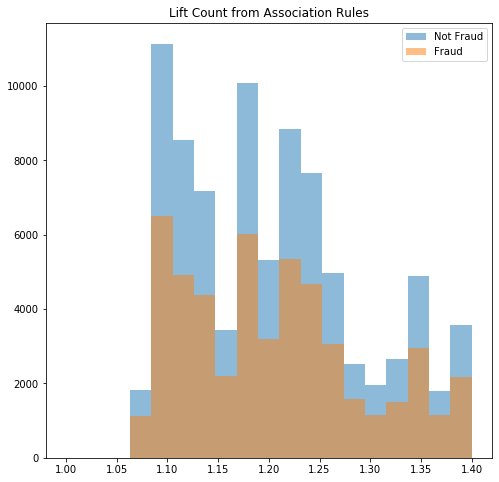

In [50]:
from matplotlib import pyplot

x = df1_rules[df1_rules["PotentialFraud"]=="No"]["lift"]
y = df1_rules[df1_rules["PotentialFraud"]=="Yes"]["lift"]


bins = np.linspace(1.0, 1.4, 20)
pyplot.hist(x, bins, alpha=0.5, label='Not Fraud')
pyplot.hist(y, bins, alpha=0.5, label='Fraud')
pyplot.legend(loc='upper right')
pyplot.title("Lift Count from Association Rules")
pyplot.show()

### Analyse Results with Diagnosis and Procedure Codes

In [51]:
df_ip = pd.read_csv("../data/code_specialty_ip.csv")
df_op = pd.read_csv("../data/code_specialty_op.csv")

/Users/hungrysoul/opt/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3063: DtypeWarning: Columns (29) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [173]:
df_ip.shape

(40474, 73)

In [174]:
df_op.shape

(517737, 70)

In [285]:
df2 = df1

In [286]:
df2.shape

(693603, 66)

In [287]:
df_ipop = pd.concat([df_ip,df_op],join='inner').merge(provider, on="Provider").merge(df2,on="ClaimID")

In [288]:
df_ipop.shape

(558211, 136)

In [289]:
df_ipop.head()

,Unnamed: 0_x,BeneID_x,ClaimID,ClaimStartDt_x,ClaimEndDt_x,Provider_x,InscClaimAmtReimbursed_x,AttendingPhysician_x,OperatingPhysician_x,OtherPhysician_x,ClmAdmitDiagnosisCode_x,DeductibleAmtPaid_x,ClmDiagnosisCode_1_x,ClmDiagnosisCode_2_x,ClmDiagnosisCode_3_x,ClmDiagnosisCode_4_x,ClmDiagnosisCode_5_x,ClmDiagnosisCode_6_x,ClmDiagnosisCode_7_x,ClmDiagnosisCode_8_x,ClmDiagnosisCode_9_x,ClmDiagnosisCode_10_x,ClmProcedureCode_1_x,ClmProcedureCode_2_x,ClmProcedureCode_3_x,ClmProcedureCode_4_x,ClmProcedureCode_5_x,ClmProcedureCode_6_x,DOB_x,DOD_x,Gender_x,Race_x,RenalDiseaseIndicator_x,State_x,County_x,NoOfMonths_PartACov_x,NoOfMonths_PartBCov_x,ChronicCond_Alzheimer,ChronicCond_Heartfailure,ChronicCond_KidneyDisease,ChronicCond_Cancer,ChronicCond_ObstrPulmonary,ChronicCond_Depression,ChronicCond_Diabetes,ChronicCond_IschemicHeart,ChronicCond_Osteoporasis,ChronicCond_rheumatoidarthritis,ChronicCond_stroke,IPAnnualReimbursementAmt_x,IPAnnualDeductibleAmt_x,OPAnnualReimbursementAmt_x,OPAnnualDeductibleAmt_x,Age_x,cardiology,urology,endocrinology,emergency,general,infectious,oncology,hematology,psychiatry,neurology,pulmonology,gastroenterology,ob-gyn,dermatology,orthopedics,congenital,neonatology,PotentialFraud_x,Unnamed: 0_y,BeneID_y,ClaimStartDt_y,ClaimEndDt_y,Provider_y,InscClaimAmtReimbursed_y,AttendingPhysician_y,OperatingPhysician_y,OtherPhysician_y,AdmissionDt,ClmAdmitDiagnosisCode_y,DeductibleAmtPaid_y,DischargeDt,DiagnosisGroupCode,ClmDiagnosisCode_1_y,ClmDiagnosisCode_2_y,ClmDiagnosisCode_3_y,ClmDiagnosisCode_4_y,ClmDiagnosisCode_5_y,ClmDiagnosisCode_6_y,ClmDiagnosisCode_7_y,ClmDiagnosisCode_8_y,ClmDiagnosisCode_9_y,ClmDiagnosisCode_10_y,ClmProcedureCode_1_y,ClmProcedureCode_2_y,ClmProcedureCode_3_y,ClmProcedureCode_4_y,ClmProcedureCode_5_y,ClmProcedureCode_6_y,Set,Status,DOB_y,DOD_y,Gender_y,Race_y,RenalDiseaseIndicator_y,State_y,County_y,NoOfMonths_PartACov_y,NoOfMonths_PartBCov_y,Alzheimer,HeartFailure,KidneyDisease,Cancer,ObstrPulmonary,Depression,Diabetes,IschemicHeart,Osteoporasis,RheumatoidArthritis,Stroke,IPAnnualReimbursementAmt_y,IPAnnualDeductibleAmt_y,OPAnnualReimbursementAmt_y,OPAnnualDeductibleAmt_y,WhetherDead,NumChronics,NumProc,NumDiag,AdmissionDays,ClaimDays,Age_y,PotentialFraud_y,preconditions
0,0,BENE11001,CLM46614,2009-04-12,2009-04-18,PRV55912,26000,PHY390922,NaN,NaN,7866,1068.0,1970,4019,5853,7843,2768,71590,2724,19889,5849,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1943-01-01,NaN,1,1,0,39,230,12,12,1,2,1,2,2,1,1,1,2,1,1,36000,3204,60,70,66.0,1,2,2,0,1,0,2,0,0,0,0,0,0,0,1,0,0,Yes,0,BENE11001,2009-04-12,2009-04-18,PRV55912,26000,PHY390922,NaN,NaN,2009-04-12,7866,1068.0,2009-04-18,201,1970,4019,5853,7843,2768,71590,2724,19889,5849,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Train,in,1943-01-01,NaN,1,1,0,Pennsylvania,230,12,12,1,0,1,0,0,1,1,1,0,1,1,36000,3204,60,70,0,7,0,10,7.0,7,66.0,Yes,"(Depression, Alzheimer, RheumatoidArthritis, D..."
1,1882,BENE17521,CLM34721,2009-01-20,2009-02-01,PRV55912,19000,PHY349293,PHY370861,PHY363291,45340,1068.0,4240,2639,2948,40390,45821,28489,5854,2753,E9305,NaN,7769.0,5849.0,NaN,NaN,NaN,NaN,1913-12-01,NaN,2,1,0,39,230,12,12,1,1,1,2,1,2,2,1,2,2,2,19000,1068,100,20,95.0,3,1,2,2,0,0,0,1,1,0,0,0,0,0,0,0,0,Yes,7635,BENE17521,2009-01-20,2009-02-01,PRV55912,19000,PHY349293,PHY370861,PHY363291,2009-01-20,45340,1068.0,2009-02-01,987,4240,2639,2948,40390,45821,28489,5854,2753,E9305,NaN,7769.0,5849.0,NaN,NaN,NaN,NaN,Train,in,1913-12-01,NaN,0,1,0,Pennsylvania,230,12,12,1,1,1,0,1,0,0,1,0,0,0,19000,1068,100,20,0,5,2,10,13.0,13,95.0,Yes,"(Alzheimer, KidneyDisease, IschemicHeart, Obst..."
2,2964,BENE21718,CLM72336,2009-10-17,2009-11-04,PRV55912,17000,PHY334706,PHY334706,NaN,V5789,1068.0,V5789,4168,73313,7812,7993,78830,72273,43812,4019,NaN,9338.0,NaN,NaN,NaN,NaN,NaN,1922-10-01,NaN,1,1,0,39,600,12,12,2,2,2,2,2,2,2,1,1,2,2,17000,1068,1050,540,87.0,3,0,0,0,4,0,0,0,0,0,0,1,0,0,2,0,0,Yes,12073,BENE21718,2009-10-17,2009-11-04,PRV55912,17000,PHY334706,PHY334706,NaN,2009-10-17,V5789,1068.0,2009-11-04,941,V5789,4168,73313,7812

In [290]:
code_analysis = df_ipop[["ClaimID",
                   'cardiology',
                   'urology',
                   'endocrinology',
                   'emergency',
                   'general',
                   'infectious',
                   'oncology',
                   'hematology',
                   'psychiatry',
                   'neurology',
                   'pulmonology',
                   'gastroenterology',
                   'ob-gyn',
                   'dermatology',
                   'orthopedics',
                   'congenital',
                   'neonatology']]

In [291]:
new = df_ipop[['ClaimID','ChronicCond_Alzheimer',
                    'ChronicCond_Heartfailure',
                    'ChronicCond_KidneyDisease',
                    'ChronicCond_Cancer',
                    'ChronicCond_ObstrPulmonary',
                    'ChronicCond_Depression',
                    'ChronicCond_Diabetes',
                    'ChronicCond_IschemicHeart',
                    'ChronicCond_Osteoporasis',
                    'ChronicCond_rheumatoidarthritis',
                    'ChronicCond_stroke']]
new.replace(2, 0,inplace=True)
new.columns = ['ClaimID','Alzheimer',
                    'HeartFailure',
                    'KidneyDisease',
                    'Cancer',
                    'ObstrPulmonary',
                    'Depression',
                    'Diabetes',
                    'IschemicHeart',
                    'Osteoporasis',
                    'Rheumatoidarthritis',
                    'Stroke']

/Users/hungrysoul/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4172: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  method=method,


In [292]:
new.head()

,ClaimID,Alzheimer,HeartFailure,KidneyDisease,Cancer,ObstrPulmonary,Depression,Diabetes,IschemicHeart,Osteoporasis,Rheumatoidarthritis,Stroke
0,CLM46614,1,0,1,0,0,1,1,1,0,1,1
1,CLM34721,1,1,1,0,1,0,0,1,0,0,0
2,CLM72336,0,0,0,0,0,0,0,1,1,0,0
3,CLM73394,0,1,0,0,1,0,1,1,1,1,0
4,CLM32911,1,0,0,1,0,0,0,1,0,0,0


In [293]:
code_analysis = code_analysis.merge(new,on="ClaimID")

In [294]:
code_analysis.head()

,ClaimID,cardiology,urology,endocrinology,emergency,general,infectious,oncology,hematology,psychiatry,neurology,pulmonology,gastroenterology,ob-gyn,dermatology,orthopedics,congenital,neonatology,Alzheimer,HeartFailure,KidneyDisease,Cancer,ObstrPulmonary,Depression,Diabetes,IschemicHeart,Osteoporasis,Rheumatoidarthritis,Stroke
0,CLM46614,1,2,2,0,1,0,2,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,1,1,1,0,1,1
1,CLM34721,3,1,2,2,0,0,0,1,1,0,0,0,0,0,0,0,0,1,1,1,0,1,0,0,1,0,0,0
2,CLM72336,3,0,0,0,4,0,0,0,0,0,0,1,0,0,2,0,0,0,0,0,0,0,0,0,1,1,0,0
3,CLM73394,2,0,2,0,1,1,0,0,0,0,0,0,0,0,2,0,0,0,1,0,0,1,0,1,1,1,1,0
4,CLM32911,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0


In [295]:
code_analysis.replace(2, 1,inplace=True)
code_analysis.replace(3, 1,inplace=True)
code_analysis.replace(4, 1,inplace=True)
code_analysis.replace(5, 1,inplace=True)
code_analysis.replace(6, 1,inplace=True)
code_analysis.replace(7, 1,inplace=True)
code_analysis.replace(8, 1,inplace=True)
code_analysis.replace(9, 1,inplace=True)
code_analysis.replace(10, 1,inplace=True)
code_analysis.replace(11, 1,inplace=True)
code_analysis.replace(12, 1,inplace=True)
code_analysis.replace(13, 1,inplace=True)
code_analysis.replace(14, 1,inplace=True)
code_analysis.replace(15, 1,inplace=True)

In [296]:
code_analysis = code_analysis.fillna(0).set_index('ClaimID')

In [297]:
code_analysis.head()

,cardiology,urology,endocrinology,emergency,general,infectious,oncology,hematology,psychiatry,neurology,pulmonology,gastroenterology,ob-gyn,dermatology,orthopedics,congenital,neonatology,Alzheimer,HeartFailure,KidneyDisease,Cancer,ObstrPulmonary,Depression,Diabetes,IschemicHeart,Osteoporasis,Rheumatoidarthritis,Stroke
ClaimID,,,,,,,,,,,,,,,,,,,,,,,,,,,,
CLM46614,1,1,1,0,1,0,1,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,1,1,1,0,1,1
CLM34721,1,1,1,1,0,0,0,1,1,0,0,0,0,0,0,0,0,1,1,1,0,1,0,0,1,0,0,0
CLM72336,1,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0
CLM73394,1,0,1,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,1,1,1,1,0
CLM32911,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0


In [298]:
code_analysis.shape

(558211, 28)

### Most Frequent Items Analysis

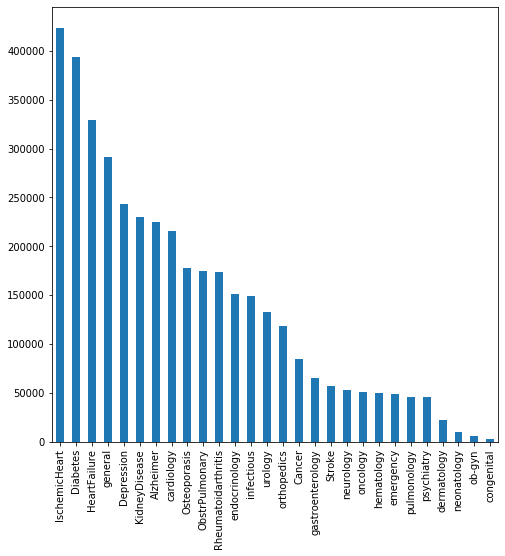

In [121]:
count = code_analysis.sum(axis = 0).sort_values(ascending=False)
count.plot(kind="bar")

### Run Apriori Algorithm and Association Rules

In [299]:
frequent_itemsets1 = apriori(code_analysis, min_support=0.3, use_colnames=True)
rules1 = association_rules(frequent_itemsets1, metric="lift", min_threshold=1)
#rules1 = association_rules(frequent_itemsets1, metric="lift", min_threshold=0)
rules1.head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(IschemicHeart),(cardiology),0.759265,0.385381,0.307486,0.404978,1.050852,0.014880,1.032935
1,(cardiology),(IschemicHeart),0.385381,0.759265,0.307486,0.797875,1.050852,0.014880,1.191019
2,(HeartFailure),(general),0.590427,0.522372,0.314107,0.532000,1.018430,0.005684,1.020571
3,(general),(HeartFailure),0.522372,0.590427,0.314107,0.601309,1.018430,0.005684,1.027293
4,(Diabetes),(general),0.705395,0.522372,0.373602,0.529636,1.013905,0.005124,1.015443


In [300]:
rules1

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(IschemicHeart),(cardiology),0.759265,0.385381,0.307486,0.404978,1.050852,0.014880,1.032935
1,(cardiology),(IschemicHeart),0.385381,0.759265,0.307486,0.797875,1.050852,0.014880,1.191019
2,(HeartFailure),(general),0.590427,0.522372,0.314107,0.532000,1.018430,0.005684,1.020571
3,(general),(HeartFailure),0.522372,0.590427,0.314107,0.601309,1.018430,0.005684,1.027293
4,(Diabetes),(general),0.705395,0.522372,0.373602,0.529636,1.013905,0.005124,1.015443
5,(general),(Diabetes),0.522372,0.705395,0.373602,0.715203,1.013905,0.005124,1.034441
6,(IschemicHeart),(general),0.759265,0.522372,0.401380,0.528644,1.012005,0.004761,1.013305
7,(general),(IschemicHeart),0.522372,0.759265,0.401380,0.768380,1.012005,0.004761,1.039354
8,(Diabetes),(Alzheimer),0.705395,0.401868,0.324997,0.460731,1.146474,0.041522,1.109154
9,(Alzheimer),(Diabetes),0.401868,0.705395,0.324997,0.808717,1.146474,0.041522,1.540153


In [301]:
rules1["ante_set"] = rules1["antecedents"].apply(lambda x: tuple(x))
rules1["con_set"] = rules1["consequents"].apply(lambda x: tuple(x))

In [302]:
rules1.head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,ante_set,con_set
0,(IschemicHeart),(cardiology),0.759265,0.385381,0.307486,0.404978,1.050852,0.014880,1.032935,"(IschemicHeart,)","(cardiology,)"
1,(cardiology),(IschemicHeart),0.385381,0.759265,0.307486,0.797875,1.050852,0.014880,1.191019,"(cardiology,)","(IschemicHeart,)"
2,(HeartFailure),(general),0.590427,0.522372,0.314107,0.532000,1.018430,0.005684,1.020571,"(HeartFailure,)","(general,)"
3,(general),(HeartFailure),0.522372,0.590427,0.314107,0.601309,1.018430,0.005684,1.027293,"(general,)","(HeartFailure,)"
4,(Diabetes),(general),0.705395,0.522372,0.373602,0.529636,1.013905,0.005124,1.015443,"(Diabetes,)","(general,)"


In [303]:
rules1['conditions'] = rules1['ante_set'] + rules1['con_set']

In [304]:
rules1.shape

(52, 12)

In [305]:
rules1.head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,ante_set,con_set,conditions
0,(IschemicHeart),(cardiology),0.759265,0.385381,0.307486,0.404978,1.050852,0.014880,1.032935,"(IschemicHeart,)","(cardiology,)","(IschemicHeart, cardiology)"
1,(cardiology),(IschemicHeart),0.385381,0.759265,0.307486,0.797875,1.050852,0.014880,1.191019,"(cardiology,)","(IschemicHeart,)","(cardiology, IschemicHeart)"
2,(HeartFailure),(general),0.590427,0.522372,0.314107,0.532000,1.018430,0.005684,1.020571,"(HeartFailure,)","(general,)","(HeartFailure, general)"
3,(general),(HeartFailure),0.522372,0.590427,0.314107,0.601309,1.018430,0.005684,1.027293,"(general,)","(HeartFailure,)","(general, HeartFailure)"
4,(Diabetes),(general),0.705395,0.522372,0.373602,0.529636,1.013905,0.005124,1.015443,"(Diabetes,)","(general,)","(Diabetes, general)"


In [306]:
df3 = code_analysis

In [307]:
for col in df3.columns:
    df3[col].replace(1,col, inplace=True)

In [308]:
df3.head()

,cardiology,urology,endocrinology,emergency,general,infectious,oncology,hematology,psychiatry,neurology,pulmonology,gastroenterology,ob-gyn,dermatology,orthopedics,congenital,neonatology,Alzheimer,HeartFailure,KidneyDisease,Cancer,ObstrPulmonary,Depression,Diabetes,IschemicHeart,Osteoporasis,Rheumatoidarthritis,Stroke
ClaimID,,,,,,,,,,,,,,,,,,,,,,,,,,,,
CLM46614,cardiology,urology,endocrinology,0,general,0,oncology,0,0,0,0,0,0,0,orthopedics,0,0,Alzheimer,0,KidneyDisease,0,0,Depression,Diabetes,IschemicHeart,0,Rheumatoidarthritis,Stroke
CLM34721,cardiology,urology,endocrinology,emergency,0,0,0,hematology,psychiatry,0,0,0,0,0,0,0,0,Alzheimer,HeartFailure,KidneyDisease,0,ObstrPulmonary,0,0,IschemicHeart,0,0,0
CLM72336,cardiology,0,0,0,general,0,0,0,0,0,0,gastroenterology,0,0,orthopedics,0,0,0,0,0,0,0,0,0,IschemicHeart,Osteoporasis,0,0
CLM73394,cardiology,0,endocrinology,0,general,infectious,0,0,0,0,0,0,0,0,orthopedics,0,0,0,HeartFailure,0,0,ObstrPulmonary,0,Diabetes,IschemicHeart,Osteoporasis,Rheumatoidarthritis,0
CLM32911,0,0,0,0,0,0,oncology,0,0,0,0,0,0,0,0,0,0,Alzheimer,0,0,Cancer,0,0,0,IschemicHeart,0,0,0


In [309]:
cols = df3.columns

df3["conditions"] = df3[cols].values.tolist()

In [310]:
df3.head()

,cardiology,urology,endocrinology,emergency,general,infectious,oncology,hematology,psychiatry,neurology,pulmonology,gastroenterology,ob-gyn,dermatology,orthopedics,congenital,neonatology,Alzheimer,HeartFailure,KidneyDisease,Cancer,ObstrPulmonary,Depression,Diabetes,IschemicHeart,Osteoporasis,Rheumatoidarthritis,Stroke,conditions
ClaimID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
CLM46614,cardiology,urology,endocrinology,0,general,0,oncology,0,0,0,0,0,0,0,orthopedics,0,0,Alzheimer,0,KidneyDisease,0,0,Depression,Diabetes,IschemicHeart,0,Rheumatoidarthritis,Stroke,"[cardiology, urology, endocrinology, 0, genera..."
CLM34721,cardiology,urology,endocrinology,emergency,0,0,0,hematology,psychiatry,0,0,0,0,0,0,0,0,Alzheimer,HeartFailure,KidneyDisease,0,ObstrPulmonary,0,0,IschemicHeart,0,0,0,"[cardiology, urology, endocrinology, emergency..."
CLM72336,cardiology,0,0,0,general,0,0,0,0,0,0,gastroenterology,0,0,orthopedics,0,0,0,0,0,0,0,0,0,IschemicHeart,Osteoporasis,0,0,"[cardiology, 0, 0, 0, general, 0, 0, 0, 0, 0, ..."
CLM73394,cardiology,0,endocrinology,0,general,infectious,0,0,0,0,0,0,0,0,orthopedics,0,0,0,HeartFailure,0,0,ObstrPulmonary,0,Diabetes,IschemicHeart,Osteoporasis,Rheumatoidarthritis,0,"[cardiology, 0, endocrinology, 0, general, inf..."
CLM32911,0,0,0,0,0,0,oncology,0,0,0,0,0,0,0,0,0,0,Alzheimer,0,0,Cancer,0,0,0,IschemicHeart,0,0,0,"[0, 0, 0, 0, 0, 0, oncology, 0, 0, 0, 0, 0, 0,..."


In [311]:
df3.shape

(558211, 29)

In [312]:
df3["conditions"] = df3["conditions"].apply(lambda x: list(filter(lambda a: a != 0, x)))

In [313]:
df3["conditions"] = df3["conditions"].apply(lambda x: tuple(x))

In [314]:
df3.drop(cols, axis=1, inplace=True)

In [315]:
df3.head()

,conditions
ClaimID,
CLM46614,"(cardiology, urology, endocrinology, general, ..."
CLM34721,"(cardiology, urology, endocrinology, emergency..."
CLM72336,"(cardiology, general, gastroenterology, orthop..."
CLM73394,"(cardiology, endocrinology, general, infectiou..."
CLM32911,"(oncology, Alzheimer, Cancer, IschemicHeart)"


In [316]:
df4 = df2.merge(df3, on="ClaimID")

In [317]:
df4.head()

,Unnamed: 0,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,AdmissionDt,ClmAdmitDiagnosisCode,DeductibleAmtPaid,DischargeDt,DiagnosisGroupCode,ClmDiagnosisCode_1,ClmDiagnosisCode_2,ClmDiagnosisCode_3,ClmDiagnosisCode_4,ClmDiagnosisCode_5,ClmDiagnosisCode_6,ClmDiagnosisCode_7,ClmDiagnosisCode_8,ClmDiagnosisCode_9,ClmDiagnosisCode_10,ClmProcedureCode_1,ClmProcedureCode_2,ClmProcedureCode_3,ClmProcedureCode_4,ClmProcedureCode_5,ClmProcedureCode_6,Set,Status,DOB,DOD,Gender,Race,RenalDiseaseIndicator,State,County,NoOfMonths_PartACov,NoOfMonths_PartBCov,Alzheimer,HeartFailure,KidneyDisease,Cancer,ObstrPulmonary,Depression,Diabetes,IschemicHeart,Osteoporasis,RheumatoidArthritis,Stroke,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt,WhetherDead,NumChronics,NumProc,NumDiag,AdmissionDays,ClaimDays,Age,PotentialFraud,preconditions,conditions
0,0,BENE11001,CLM46614,2009-04-12,2009-04-18,PRV55912,26000,PHY390922,NaN,NaN,2009-04-12,7866,1068.0,2009-04-18,201,1970,4019,5853,7843,2768,71590,2724,19889,5849,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Train,in,1943-01-01,NaN,1,1,0,Pennsylvania,230,12,12,1,0,1,0,0,1,1,1,0,1,1,36000,3204,60,70,0,7,0,10,7.0,7,66.0,Yes,"(Depression, Alzheimer, RheumatoidArthritis, D...","(cardiology, urology, endocrinology, general, ..."
1,1,BENE11001,CLM66048,2009-08-31,2009-09-02,PRV55907,5000,PHY318495,PHY318495,NaN,2009-08-31,6186,1068.0,2009-09-02,750,6186,2948,56400,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7092.0,NaN,NaN,NaN,NaN,NaN,Train,in,1943-01-01,NaN,1,1,0,Pennsylvania,230,12,12,1,0,1,0,0,1,1,1,0,1,1,36000,3204,60,70,0,7,1,4,3.0,3,67.0,No,"(Depression, Alzheimer, RheumatoidArthritis, D...","(urology, psychiatry, gastroenterology, Alzhei..."
2,2,BENE11001,CLM68358,2009-09-17,2009-09-20,PRV56046,5000,PHY372395,NaN,PHY324689,2009-09-17,29590,1068.0,2009-09-20,883,29623,30390,71690,34590,V1581,32723,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Train,in,1943-01-01,NaN,1,1,0,Pennsylvania,230,12,12,1,0,1,0,0,1,1,1,0,1,1,36000,3204,60,70,0,7,0,7,4.0,4,67.0,No,"(Depression, Alzheimer, RheumatoidArthritis, D...","(general, oncology, psychiatry, neurology, ort..."
3,3,BENE11011,CLM38412,2009-02-14,2009-02-22,PRV52405,5000,PHY369659,PHY392961,PHY349768,2009-02-14,431,1068.0,2009-02-22,067,43491,2762,7843,32723,V1041,4254,25062,40390,4019,NaN,331.0,NaN,NaN,NaN,NaN,NaN,Train,in,1914-03-01,NaN,0,2,0,Alabama,360,12,12,0,1,1,0,0,1,1,0,0,1,1,5000,1068,250,320,0,6,1,10,9.0,9,95.0,No,"(Depression, RheumatoidArthritis, Diabetes, Ki...","(cardiology, endocrinology, general, infectiou..."
4,4,BENE11011,CLM144521,2009-01-18,2009-01-18,PRV52314,50,PHY379398,NaN,NaN,NaN,78900,0.0,NaN,NaN,78969,78701,V5866,59389,2449,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Train,out,1914-03-01,NaN,0,2,0,Alabama,360,12,12,0,1,1,0,0,1,1,0,0,1,1,5000,1068,250,320,0,6,0,6,NaN,1,95.0,No,"(Depression, RheumatoidArthritis, Diabetes, Ki...","(urology, endocrinology, general, HeartFailure..."


In [318]:
df4.shape

(558211, 67)

In [319]:
df5 = df4.merge(rules1, on="conditions", how="left")

In [320]:
df5.tail()

,Unnamed: 0,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,AdmissionDt,ClmAdmitDiagnosisCode,DeductibleAmtPaid,DischargeDt,DiagnosisGroupCode,ClmDiagnosisCode_1,ClmDiagnosisCode_2,ClmDiagnosisCode_3,ClmDiagnosisCode_4,ClmDiagnosisCode_5,ClmDiagnosisCode_6,ClmDiagnosisCode_7,ClmDiagnosisCode_8,ClmDiagnosisCode_9,ClmDiagnosisCode_10,ClmProcedureCode_1,ClmProcedureCode_2,ClmProcedureCode_3,ClmProcedureCode_4,ClmProcedureCode_5,ClmProcedureCode_6,Set,Status,DOB,DOD,Gender,Race,RenalDiseaseIndicator,State,County,NoOfMonths_PartACov,NoOfMonths_PartBCov,Alzheimer,HeartFailure,KidneyDisease,Cancer,ObstrPulmonary,Depression,Diabetes,IschemicHeart,Osteoporasis,RheumatoidArthritis,Stroke,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt,WhetherDead,NumChronics,NumProc,NumDiag,AdmissionDays,ClaimDays,Age,PotentialFraud,preconditions,conditions,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,ante_set,con_set
558206,577933,BENE159198,CLM510792,2009-08-06,2009-08-06,PRV53699,800,PHY364188,PHY364188,PHY385752,NaN,NaN,0.0,NaN,NaN,2163,V4575,53190,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Train,out,1952-04-01,NaN,0,1,0,Maryland,20,12,12,1,1,0,0,0,1,1,0,0,1,0,0,0,5470,1870,0,5,0,3,NaN,1,57.0,No,"(Depression, Alzheimer, RheumatoidArthritis, D...","(cardiology, general, oncology, gastroenterolo...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
558207,577934,BENE159198,CLM551294,2009-08-29,2009-08-29,PRV53702,400,PHY423019,PHY332284,NaN,NaN,NaN,0.0,NaN,NaN,07041,5781,25000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Train,out,1952-04-01,NaN,0,1,0,Maryland,20,12,12,1,1,0,0,0,1,1,0,0,1,0,0,0,5470,1870,0,5,0,3,NaN,1,57.0,No,"(Depression, Alzheimer, RheumatoidArthritis, D...","(endocrinology, infectious, gastroenterology, ...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
558208,577935,BENE159198,CLM596444,2009-09-24,2009-09-24,PRV53676,60,PHY361063,NaN,NaN,NaN,NaN,0.0,NaN,NaN,V570,78079,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Train,out,1952-04-01,NaN,0,1,0,Maryland,20,12,12,1,1,0,0,0,1,1,0,0,1,0,0,0,5470,1870,0,5,0,2,NaN,1,57.0,No,"(Depression, Alzheimer, RheumatoidArthritis, D...","(general, infectious, Alzheimer, HeartFailure,...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
558209,577936,BENE159198,CLM636992,2009-10-18,2009-10-18,PRV53689,70,PHY403198,NaN,PHY419379,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Train,out,1952-04-01,NaN,0,1,0,Maryland,20,12,12,1,1,0,0,0,1,1,0,0,1,0,0,0,5470,1870,0,5,0,0,NaN,1,58.0,No,"(Depression, Alzheimer, RheumatoidArthritis, D...","(Alzheimer, HeartFailure, Depression, Diabetes...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
558210,577937,BENE159198,CLM686139,2009-11-17,2009-11-18,PRV53689,80,PHY419379,NaN,PHY419379,NaN,NaN,0.0,NaN,NaN,78900,78609,4280,71946,3310,75311,2724,V103,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Train,out,1952-04-01,NaN,0,1,0,Maryland,20,12,12,1,1,0,0,0,1,1,0,0,1,0,0,0,5470,1870,0,5,0,8,NaN,2,58.0,No,"(Depression, Alzheimer, RheumatoidArthritis, D...","(cardiology, endocrinology, general, infectiou...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [321]:
df5.shape

(558211, 78)

In [322]:
df6 = df5[['BeneID',
          'ClaimID',
          'Provider',
          'conditions',
          'confidence',
          'lift'
          ]]

In [323]:
df6.head()

,BeneID,ClaimID,Provider,conditions,confidence,lift
0,BENE11001,CLM46614,PRV55912,"(cardiology, urology, endocrinology, general, ...",NaN,NaN
1,BENE11001,CLM66048,PRV55907,"(urology, psychiatry, gastroenterology, Alzhei...",NaN,NaN
2,BENE11001,CLM68358,PRV56046,"(general, oncology, psychiatry, neurology, ort...",NaN,NaN
3,BENE11011,CLM38412,PRV52405,"(cardiology, endocrinology, general, infectiou...",NaN,NaN
4,BENE11011,CLM144521,PRV52314,"(urology, endocrinology, general, HeartFailure...",NaN,NaN


In [324]:
df6.shape

(558211, 6)

In [325]:
df7 = df6.groupby("Provider").agg({"confidence": "mean", "lift": "mean"})

In [326]:
df7.shape

(5410, 2)

In [327]:
df7.sort_values("confidence",ascending=True)

,confidence,lift
Provider,,
PRV55390,0.538080,1.306013
PRV51003,0.600969,1.020853
PRV53359,0.600969,1.020853
PRV53376,0.600969,1.020853
PRV53569,0.600969,1.020853
...,...,...
PRV57757,NaN,NaN
PRV57758,NaN,NaN
PRV57759,NaN,NaN


In [328]:
con_mean = df7["confidence"].mean()

In [329]:
lift_mean = df7["lift"].mean()

In [330]:
con_mean

0.7523472480112092

In [331]:
lift_mean

1.0691021621269516

In [332]:
df7_zero = df7.fillna(0)

In [333]:
df7_zero.shape

(5410, 2)

In [334]:
df7_zero.to_csv("../data/MBA_zero.csv")

In [335]:
df7_mean = df7

In [336]:
df7_mean["confidence"] = df7_mean["confidence"].fillna(con_mean)
df7_mean["lift"] = df7_mean["lift"].fillna(lift_mean)

In [337]:
df7_mean

,confidence,lift
Provider,,
PRV51001,0.752347,1.069102
PRV51003,0.600969,1.020853
PRV51004,0.752347,1.069102
PRV51005,0.718527,1.068306
PRV51007,0.752347,1.069102
...,...,...
PRV57759,0.752347,1.069102
PRV57760,0.752347,1.069102
PRV57761,0.768380,1.012005


In [338]:
df7_mean.to_csv("../data/MBA_mean.csv")

In [339]:
fraud_df = df7_zero.merge(provider, on="Provider")

In [348]:
fraud_df.head()

,Provider,confidence,lift,PotentialFraud
0,PRV51001,0.000000,0.000000,No
1,PRV51003,0.600969,1.020853,Yes
2,PRV51004,0.000000,0.000000,No
3,PRV51005,0.718527,1.068306,Yes
4,PRV51007,0.000000,0.000000,No
